In [2]:
import networkx as nx
import numpy as np
import requests
import matplotlib.pyplot as plt
from collections import Counter
from io import BytesIO

url = "https://raw.githubusercontent.com/fridapfrandsen/network-data/main/rock_network.gexf"

response = requests.get(url)
response.raise_for_status()

G = nx.read_gexf(BytesIO(response.content))
G_undirected = G.to_undirected()

---
# Part 1: Analyze the network
---

In this analysis, we explore a network of rock artists constructed from a list of "mainstream rock performers" from Wikipedia. Each artist is represented as a node, and directed links between artists are established when one artist is mentioned on another artist’s Wikipedia page. 

The graph has been stored in a .gexf file and fetched via a github link. 

When fetched here the nodes in the graph have the following attributes:
 - *Length of content*: the total word count of the artist’s Wikipedia page,
 - *Genres*: the musical genres listed in the artist’s infobox,
 - *Wikitext*: the cleaned text of the page.

In the following sections, we analyze both the directed and undirected versions of the network using concepts from network science.

The goal of this analysis is to characterize the structural properties of the network.

## General network statistics

We start the analysis by looking into 
 - Network size (nodes and edges)
 - Degree distributions (in/out for directed graphs)
 - Average shortest path length

In [3]:
n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges()
n_edges_undir = G_undirected.number_of_edges()
density = 2 * n_edges / (n_nodes * (n_nodes - 1))

in_degrees = [d for n, d in G.in_degree()]
out_degrees = [d for n, d in G.out_degree()]

avg_in = sum(in_degrees) / len(in_degrees)
avg_out = sum(out_degrees) / len(out_degrees)

print(f"Number of nodes: {n_nodes}")
print(f"Number of edges: {n_edges}")
print(f"Number of edges in undirected graph: {n_edges_undir}")
print(f"Average degree of the undirected graph: {2 * G_undirected.number_of_edges() / G_undirected.number_of_nodes():.2f}")
print(f"Average in and out-degree:  {avg_in:.2f}")
print(f"Density of graph: {density}")

Number of nodes: 484
Number of edges: 7283
Number of edges in undirected graph: 5987
Average degree of the undirected graph: 24.74
Average in and out-degree:  15.05
Density of graph: 0.062308574166281674


We have 484 artists in our network with 7283 edges in the directed graph.
In the undirected version, there are only 5987 edges, meaning that in over 1000 cases, two artists link to each other. This is not surprising, as we would expect rock musicians who have collaborated to mutually refer to one another.

We can also conclude that in roughly 5000 cases, a Wikipedia page links to another without getting a link back.

We also note that about 6% of all possible node pairs are connected.

## In and out degrees

Next we look into the statistics concerning in and out degrees and the distribution of these.

In [4]:
print("\nIn-Degree Statistics:")
print(f"  Average: {np.mean(in_degrees):.2f}")
print(f"  Median: {np.median(in_degrees):.2f}")
print(f"  Mode: {Counter(in_degrees).most_common(1)[0][0]}")
print(f"  Min: {np.min(in_degrees)}")
print(f"  Max: {np.max(in_degrees)}")
print(f"  Std Dev: {np.std(in_degrees):.2f}")

print("\nOut-Degree Statistics:")
print(f"  Average: {np.mean(out_degrees):.2f}")
print(f"  Median: {np.median(out_degrees):.2f}")
print(f"  Mode: {Counter(out_degrees).most_common(1)[0][0]}")
print(f"  Min: {np.min(out_degrees)}")
print(f"  Max: {np.max(out_degrees)}")
print(f"  Std Dev: {np.std(out_degrees):.2f}")


In-Degree Statistics:
  Average: 15.05
  Median: 10.00
  Mode: 3
  Min: 0
  Max: 119
  Std Dev: 16.98

Out-Degree Statistics:
  Average: 15.05
  Median: 13.00
  Mode: 12
  Min: 0
  Max: 73
  Std Dev: 10.54


We can see that the in-degree varies more than the out-degree.

This can probably be explained by the fact that many artists refer to the larger, more well-known bands, which therefore have a high in-degree, while most bands only receive a few incoming links.

The out-degree varies less, which is propably because most bands tend to reference only a small number of other artists.

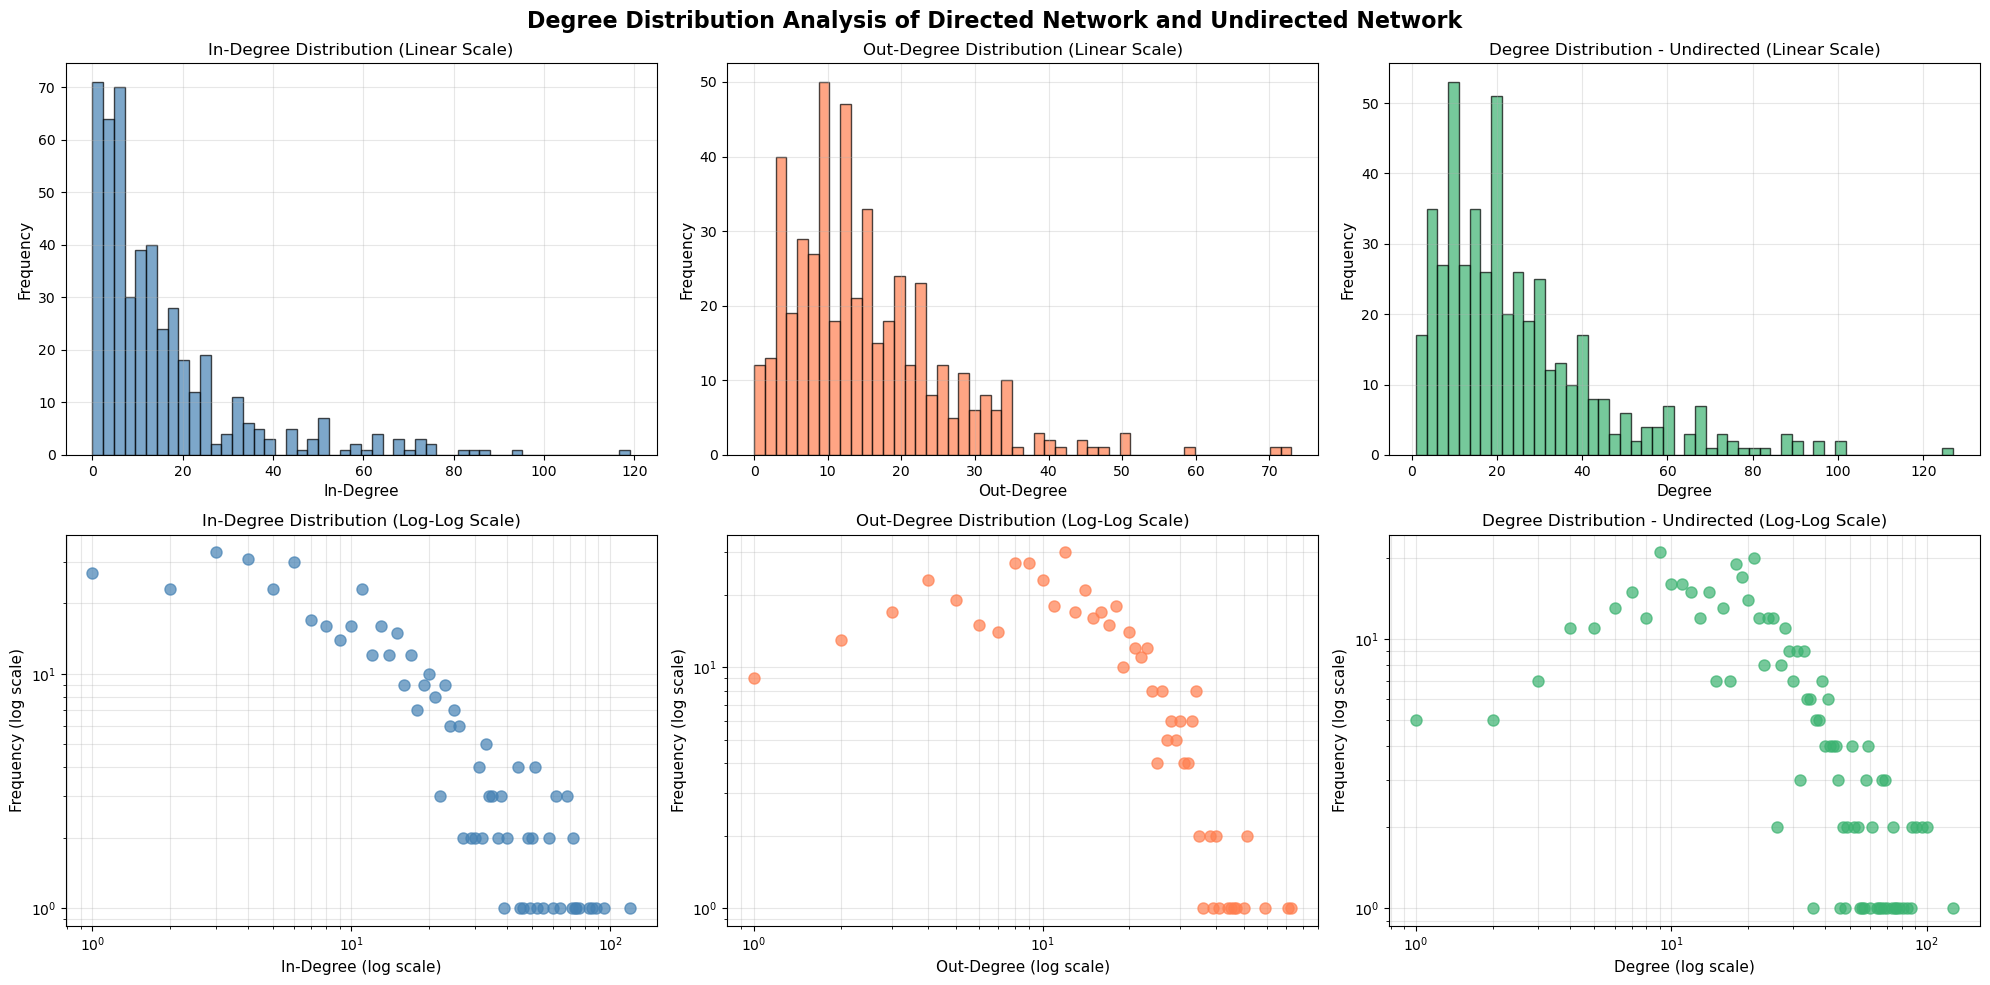

In [5]:
# Create visualizations
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Degree Distribution Analysis of Directed Network and Undirected Network', fontsize=16, fontweight='bold')
degrees = [d for n, d in G_undirected.degree()]

# In-degree distribution (linear scale)
axes[0, 0].hist(in_degrees, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
axes[0, 0].set_xlabel('In-Degree', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('In-Degree Distribution (Linear Scale)', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)

# Out-degree distribution (linear scale)
axes[0, 1].hist(out_degrees, bins=50, alpha=0.7, color='coral', edgecolor='black')
axes[0, 1].set_xlabel('Out-Degree', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Out-Degree Distribution (Linear Scale)', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

# Undirected degree distribution (linear scale)
axes[0, 2].hist(degrees, bins=50, alpha=0.7, color='mediumseagreen', edgecolor='black')
axes[0, 2].set_xlabel('Degree', fontsize=11)
axes[0, 2].set_ylabel('Frequency', fontsize=11)
axes[0, 2].set_title('Degree Distribution - Undirected (Linear Scale)', fontsize=12)
axes[0, 2].grid(True, alpha=0.3)

# In-degree distribution (log-log scale)
in_degree_counts = Counter(in_degrees)
degrees_in = sorted(in_degree_counts.keys())
counts_in = [in_degree_counts[d] for d in degrees_in]
axes[1, 0].loglog(degrees_in, counts_in, 'o', alpha=0.7, color='steelblue', markersize=8)
axes[1, 0].set_xlabel('In-Degree (log scale)', fontsize=11)
axes[1, 0].set_ylabel('Frequency (log scale)', fontsize=11)
axes[1, 0].set_title('In-Degree Distribution (Log-Log Scale)', fontsize=12)
axes[1, 0].grid(True, alpha=0.3, which='both')

# Out-degree distribution (log-log scale)
out_degree_counts = Counter(out_degrees)
degrees_out = sorted(out_degree_counts.keys())
counts_out = [out_degree_counts[d] for d in degrees_out]
axes[1, 1].loglog(degrees_out, counts_out, 'o', alpha=0.7, color='coral', markersize=8)
axes[1, 1].set_xlabel('Out-Degree (log scale)', fontsize=11)
axes[1, 1].set_ylabel('Frequency (log scale)', fontsize=11)
axes[1, 1].set_title('Out-Degree Distribution (Log-Log Scale)', fontsize=12)
axes[1, 1].grid(True, alpha=0.3, which='both')

# Undirected degree distribution (log-log scale)
degree_counts = Counter(degrees)
degree_vals = sorted(degree_counts.keys())
counts = [degree_counts[d] for d in degree_vals]
axes[1, 2].loglog(degree_vals, counts, 'o', alpha=0.7, color='mediumseagreen', markersize=8)
axes[1, 2].set_xlabel('Degree (log scale)', fontsize=11)
axes[1, 2].set_ylabel('Frequency (log scale)', fontsize=11)
axes[1, 2].set_title('Degree Distribution - Undirected (Log-Log Scale)', fontsize=12)
axes[1, 2].grid(True, alpha=0.3, which='both')


plt.tight_layout()


The plots above visualize the degree distributions for the in-degree, out-degree, and the undirected version of the network.

The in-degree distribution resembles a scale-free network, where most nodes have a low degree and a few nodes (the largest, most well-known bands) have a very high in-degree.

The out-degree distribution appears more similar to a random network, with degrees roughly normally distributed around 13.

The undirected degree distribution lies somewhere between these two patterns — it shows characteristics of both random and scale-free networks, but clearly has the long tail we know from scale-free networks.

## Centralities and assortativity

Next we examine the centrality and assortativity of the network

In [6]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G_undirected)

print(f"Average degree centrality:      {sum(degree_centrality.values())/len(degree_centrality):.4f}")
print(f"Average betweenness centrality: {sum(betweenness_centrality.values())/len(betweenness_centrality):.4f}")
print(f"Average eigenvector centrality: {sum(eigenvector_centrality.values())/len(eigenvector_centrality):.4f}")

assort = nx.degree_assortativity_coefficient(G)
print(f"Degree assortativity: {assort:.4f}")

Average degree centrality:      0.0623
Average betweenness centrality: 0.0036
Average eigenvector centrality: 0.0343
Degree assortativity: 0.0376


The average degree centrality is relatively low, indicating that most artists are directly connected to only a small fraction of the other artists in the network.

The quite low betweenness centrality indicates that only a few nodes act as important bridges, while most connections do not frequently lie on the shortest paths between others.

Similarly the relatively low eigenvector centrality shows that only a limited subset of artists are structurally influential, meaning that most artists are not strongly connected to other highly connected ones.

Finally, the low degree assortativity implies that the network is only weakly hierarchical — large and small bands tend to mix rather than forming separate clusters.

Next we plot the distribution of the centrality.

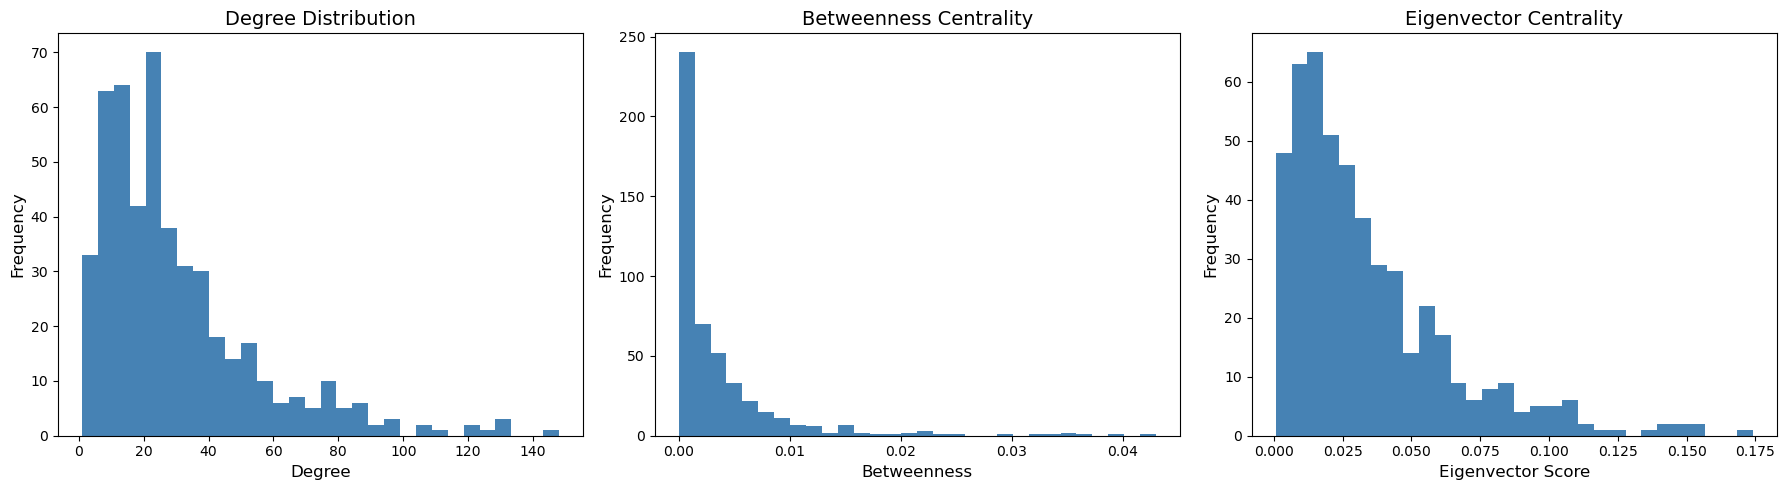

In [7]:
# plt.style.use("ggplot")   # nicer default style

degree_vals = [deg for _, deg in G.degree()]
betweenness_vals = list(betweenness_centrality.values())
eigenvector_vals = list(eigenvector_centrality.values())

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
color = "steelblue"

# Degree
axes[0].hist(degree_vals, bins=30, color=color)
axes[0].set_title("Degree Distribution", fontsize=14)
axes[0].set_xlabel("Degree", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)

# Betweenness
axes[1].hist(betweenness_vals, bins=30, color=color)
axes[1].set_title("Betweenness Centrality", fontsize=14)
axes[1].set_xlabel("Betweenness", fontsize=12)
axes[1].set_ylabel("Frequency", fontsize=12)

# Eigenvector
axes[2].hist(eigenvector_vals, bins=30, color=color)
axes[2].set_title("Eigenvector Centrality", fontsize=14)
axes[2].set_xlabel("Eigenvector Score", fontsize=12)
axes[2].set_ylabel("Frequency", fontsize=12)

plt.tight_layout()
plt.show()

Most nodes have a betweenness centrality close to zero and therefore do not play a central bridge role, as they rarely lie on the shortest paths between other nodes. Only a few nodes act as bridges connecting different clusters of the network. This means that only a few artists acts as links between different groups of artists.

Similarly, most nodes have low eigenvector centrality, meaning that they are mainly connected within small, less influential clusters. Some nodes fall in between, having moderate influence and a few connections to some more central parts of the network. Finally, a small number of nodes show high eigenvector centrality, indicating that they are connected to the most influential and well-connected parts of the network.

## Network visualization and backbone

Lastly, we wish to visualize our network. We plot both the full network and a reduced backbone version.

We start with the full undirected network:

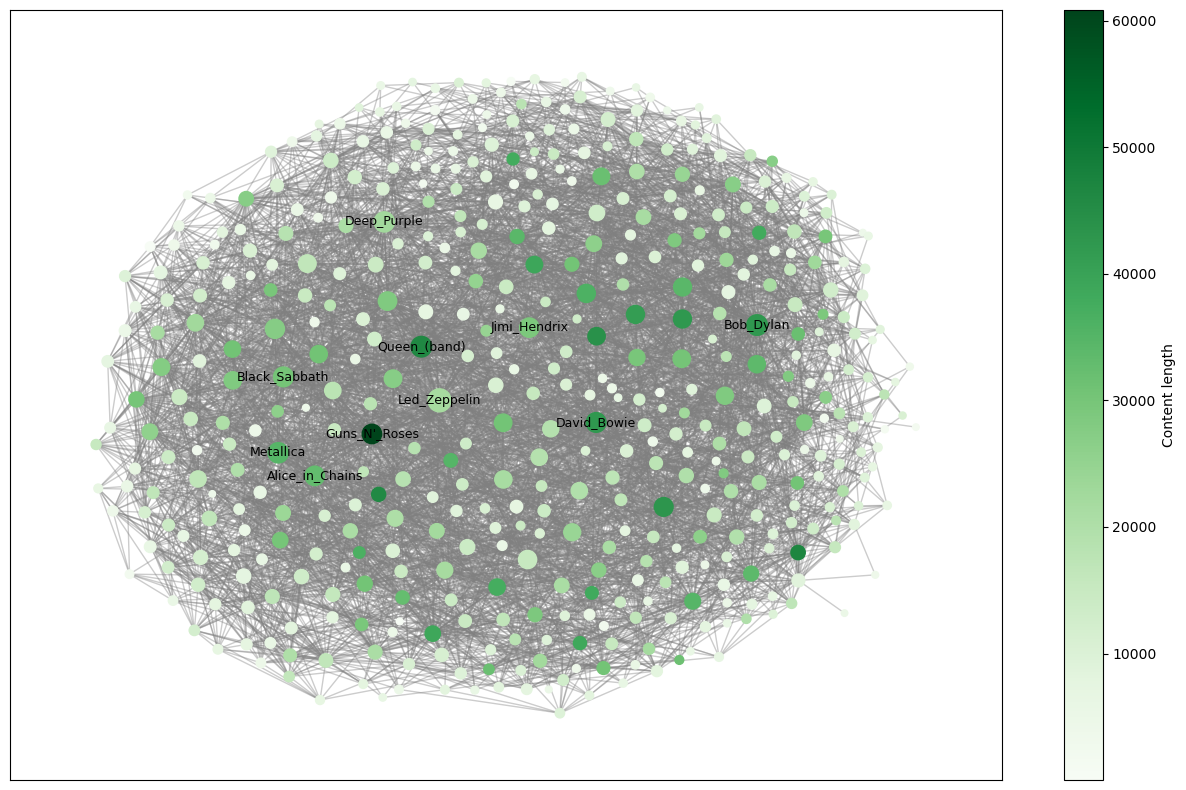

In [8]:
# Find node size
degrees = dict(G_undirected.degree())
node_sizes = [20 + deg * 2 for deg in degrees.values()] 

# Node colors
content_lengths = nx.get_node_attributes(G_undirected, "len_of_content")
node_colors = [content_lengths.get(n, 0) for n in G_undirected.nodes()]

pos = nx.forceatlas2_layout(G_undirected, max_iter=500, scaling_ratio=2.0, gravity=1.0, strong_gravity=True, seed=30)

plt.figure(figsize=(16, 10))
nodes = nx.draw_networkx_nodes(G_undirected, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.Greens, alpha=1)
nx.draw_networkx_edges(G_undirected, pos, edge_color="gray", alpha=0.4)

top_nodes = sorted(degrees, key=degrees.get, reverse=True)[:10]
labels = {n: n for n in top_nodes}
nx.draw_networkx_labels(G_undirected, pos, labels, font_size=9, font_weight='normal') 

plt.colorbar(nodes, label="Content length")
plt.show()

The figure above shows the complete undirected network.

The size of each node represents its degree — the larger the node, the more connections the artist has.

The color of each node indicates the length of the artist’s Wikipedia page, with darker green corresponding to longer articles.

The 10 nodes with the highest degree are labeled by name in the plot, highlighting the most central and well-connected artists in the network.

To get a clearer visualization of the network, we create a backbone version of it.

We remove 85% of the edges by filtering out those with the lowest betweenness centrality, next removing any nodes that become isolated as a result.

This simplification highlights the most important structural connections in the network, making it easier to identify the central hubs and get an overall overview.

In [9]:
def backbone_low_betweenness(G_undirected, n_remove):
    # Work on a copy
    Gb = G_undirected.copy()

    # Compute edge betweenness
    ebc = nx.edge_betweenness_centrality(Gb)

    # Sort edges: lowest betweenness first
    edges_sorted = sorted(ebc.items(), key=lambda x: x[1])

    # Select lowest n_remove edges
    edges_to_remove = [edge for edge, score in edges_sorted[:n_remove]]

    # Remove edges
    Gb.remove_edges_from(edges_to_remove)

    # Remove isolated nodes
    isolated = list(nx.isolates(Gb))
    Gb.remove_nodes_from(isolated)

    return Gb


# --- Run ---
G_backbone = backbone_low_betweenness(G_undirected, n_remove=int(G_undirected.number_of_edges()*0.85))


print("Nodes:", G_backbone.number_of_nodes())
print("Edges:", G_backbone.number_of_edges())



Nodes: 440
Edges: 899


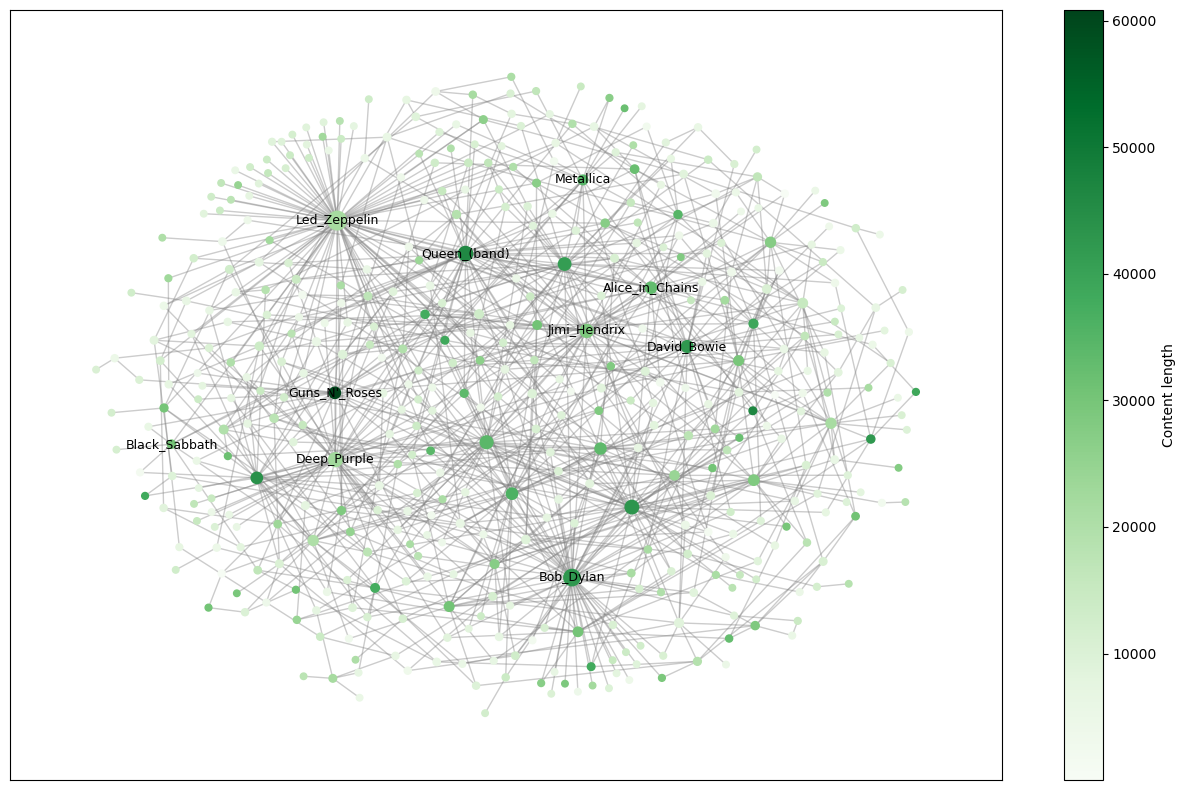

In [10]:
degrees_backbone = dict(G_backbone.degree())
backbone_node_sizes = [20 + deg * 2 for deg in degrees_backbone.values()]

backbone_content_lengths = nx.get_node_attributes(G_backbone, "len_of_content")
backbone_node_colors = [content_lengths.get(n, 0) for n in G_backbone.nodes()]

pos = nx.forceatlas2_layout(G_backbone, max_iter=500, scaling_ratio=2.0, gravity=1.0, strong_gravity=True, seed=30)

plt.figure(figsize=(16, 10))
nodes = nx.draw_networkx_nodes(G_backbone, pos, node_size=backbone_node_sizes, node_color=backbone_node_colors, cmap=plt.cm.Greens, alpha=1)
nx.draw_networkx_edges(G_backbone, pos, edge_color="gray", alpha=0.4)

top_nodes_backbone = sorted(degrees_backbone, key=degrees.get, reverse=True)[:10]
labels = {n: n for n in top_nodes_backbone}
nx.draw_networkx_labels(G_backbone, pos, labels, font_size=9, font_weight='normal')

plt.colorbar(nodes, label="Content length")
plt.show()

The backbone reveals a core of influential artists — such as Led Zeppelin, Queen, Metallica, Jimi Hendrix, and Bob Dylan — who act as hubs connecting different parts of the rock music. 